In [ ]:
#pip install tensorflow

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.15.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing 

In [6]:
#import the dataset
from tensorflow.keras.datasets import mnist #built-in dataset

In [8]:
# loading the dataset, in two tuples
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


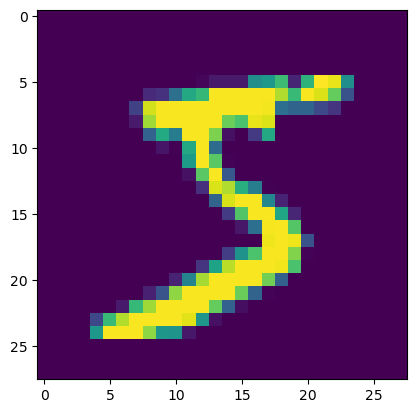

In [10]:
plt.imshow(x_train[0]) #let's check the images

In [11]:
y_train[0]

5

In [12]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

We see that there are 60,000 images and the size of these images is (28 x 28).

In [13]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

We see that there are 10,000 images and the size of these images is (28 x 28).

In [14]:
# let's check minimum and maximum values in these images
x_train.min(), x_train.max()

(0, 255)

This is the pixel values in the image, which ranges from 0-255

In [15]:
y_train.min(), y_train.max()

(0, 9)

As we can see there are 10 different values(from 0-9).

In [16]:
# normalise the images
x_train=x_train/255.0
x_test=x_test/255.0

In [18]:
# let's again check minimum and maximum values in these images aftern normalising, normalising will fasten up the process
x_train.min(), x_train.max()

(0.0, 1.0)

In [19]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [20]:
# we have to reshape the images, in 3d from 2d
x_train=x_train.reshape(60000, 28, 28,1)
x_test=x_test.reshape(10000, 28, 28,1) 
# in parentheses we have specified the new shape, as we wish top convert it from 2d to 3d.

In [21]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [22]:
input_shape=x_train[0].shape

In [23]:
print(input_shape)

(28, 28, 1)


This would be the input_shape we would be entering in the first layer of CNN

# Building the model

In [32]:
# defining the object
# and initializing our CNN
model=tf.keras.models.Sequential()

In [33]:
# ADDING THE first CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

# adding the second CNN Layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# adding maxpool layer, pooling layer extracts the dominat features and reduces the size of convolved features
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# adding dropout layer, its a regularisation term and would counter overfitting 
model.add(tf.keras.layers.Dropout(0.4))

# adding the flatten layer
model.add(tf.keras.layers.Flatten())

#adding the dense layer (fully connected layer)
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

#adding the output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))  #units=10, as the outtput should be from 0-9

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Training the model

In [38]:
# Training the model
history=model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10


469/469 [==============================] - 95s 195ms/step - loss: 0.1722 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.0522 - val_sparse_categorical_accuracy: 0.9824
Epoch 2/10
469/469 [==============================] - 92s 197ms/step - loss: 0.0523 - sparse_categorical_accuracy: 0.9842 - val_loss: 0.0329 - val_sparse_categorical_accuracy: 0.9885
Epoch 3/10
469/469 [==============================] - 93s 198ms/step - loss: 0.0362 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0322 - val_sparse_categorical_accuracy: 0.9888
Epoch 4/10
469/469 [==============================] - 119s 253ms/step - loss: 0.0265 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.0291 - val_sparse_categorical_accuracy: 0.9905
Epoch 5/10
469/469 [==============================] - 96s 206ms/step - loss: 0.0212 - sparse_categorical_accuracy: 0.9929 - val_loss: 0.0295 - val_sparse_categorical_accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 112s 239ms/step - loss: 0.01

In [56]:
# model predictions
y_pred=(model.predict(x_test) > 0.5).astype("int32")

313/313 [==============================] - 4s 14ms/step


In [57]:
#checking for some index
y_pred[3], y_test[3]

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 0)

# Learning Curve

In [50]:
def learning_curve (history, epoch):
    
    #training vs validation accuracy
    epoch_range =range(1, epoch+1)
    plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
    plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('sparse_categorical_accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()
    
    # training vs validation loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()


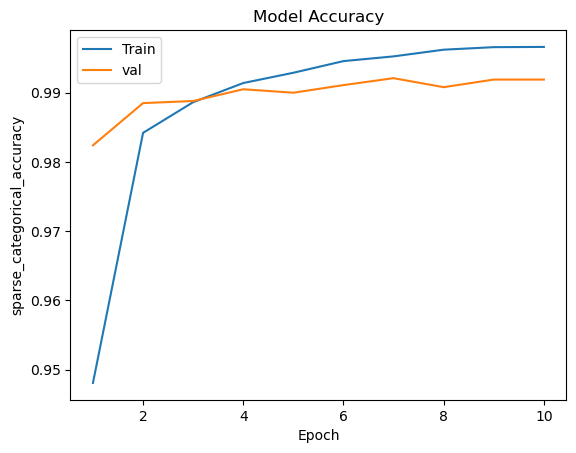

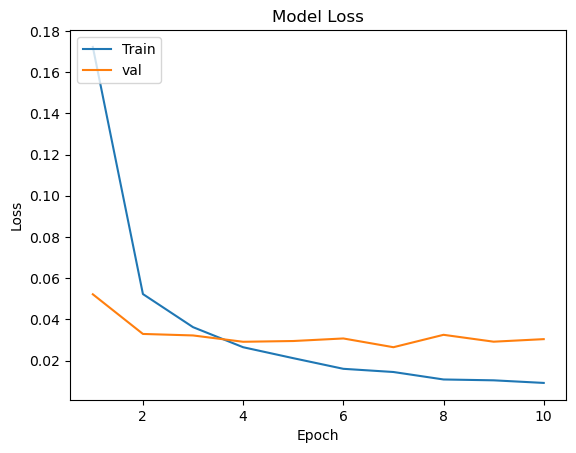

In [62]:
learning_curve(history,10)